In [12]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import HowToBreakIntoTheField as t
%matplotlib inline
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score, mean_squared_error
#import seaborn as sns


df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc

In [16]:
sub1 = df[['HaveWorkedLanguage','WantWorkLanguage']]
sub2 = df[['HaveWorkedFramework','WantWorkFramework']]
sub3 = df[['HaveWorkedDatabase','WantWorkDatabase']]
sub4 = df[['HaveWorkedPlatform','WantWorkPlatform']]

def clean_and_plot_sub3(df, plot=True):
    '''
    INPUT 
        df - a dataframe holding the SelfTaughtTypes column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the SelfTaughtTypes column.
    '''
    study1 = df['HaveWorkedDatabase'].value_counts().reset_index()
    study1.rename(columns={'index': 'method', 'HaveWorkedDatabase': 'count'}, inplace=True)
    study_df1 = t.total_count(study1, 'method', 'count', possible_vals3)
    
    study2 = df['WantWorkDatabase'].value_counts().reset_index()
    study2.rename(columns={'index': 'method', 'WantWorkDatabase': 'count'}, inplace=True)
    study_df2 = t.total_count(study2, 'method', 'count', possible_vals3)

    study_df1.set_index('method', inplace=True)
    study_df2.set_index('method', inplace=True)
    if plot:
        (study_df1/study_df1.sum()).plot(kind='bar', legend=None);
        plt.title('Worked Database');
        plt.show()
        (study_df2/study_df2.sum()).plot(kind='bar', legend=None,color='#d65f5f');
        plt.title('Want Database');
        plt.show()
    props_study_df = (study_df1/study_df1.sum(),study_df2/study_df2.sum())
    return props_study_df
sub1_rm = sub1.dropna(subset=['HaveWorkedLanguage','WantWorkLanguage']) # remove missing value
sub2_rm = sub2.dropna(subset=['HaveWorkedFramework','WantWorkFramework'])
sub3_rm = sub3.dropna(subset=['HaveWorkedDatabase','WantWorkDatabase'])
sub4_rm = sub4.dropna(subset=['HaveWorkedPlatform','WantWorkPlatform'])

In [17]:
possible_vals2 = ['AngularJS','Hadoop','Node.JS','React','Spark','Cordova','Xamarin','Firebase','.NET Core']

def clean_and_plot_sub2(df, plot=True):
    '''
    INPUT 
        df - a dataframe holding the SelfTaughtTypes column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the SelfTaughtTypes column.
    '''
    study1 = df['HaveWorkedFramework'].value_counts().reset_index()
    study1.rename(columns={'index': 'method', 'HaveWorkedFramework': 'count'}, inplace=True)
    study_df1 = t.total_count(study1, 'method', 'count', possible_vals2)
    
    study2 = df['WantWorkFramework'].value_counts().reset_index()
    study2.rename(columns={'index': 'method', 'WantWorkFramework': 'count'}, inplace=True)
    study_df2 = t.total_count(study2, 'method', 'count', possible_vals2)

    study_df1.set_index('method', inplace=True)
    study_df2.set_index('method', inplace=True)
    if plot:
        (study_df1/study_df1.sum()).plot(kind='bar', legend=None);
        plt.title('Worked Framework');
        plt.show()
        (study_df2/study_df2.sum()).plot(kind='bar', legend=None,color='#d65f5f');
        plt.title('Want Framework');
        plt.show()
    props_study_df = (study_df1/study_df1.sum(),study_df2/study_df2.sum())
    return props_study_df

In [18]:
possible_vals3 = ['Cassandra','MongoDB','Redis','SQL Server','MySQL','PostgreSQL','Oracle','SQLite']

def clean_and_plot_sub3(df, plot=True):
    '''
    INPUT 
        df - a dataframe holding the SelfTaughtTypes column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the SelfTaughtTypes column.
    '''
    study1 = df['HaveWorkedDatabase'].value_counts().reset_index()
    study1.rename(columns={'index': 'method', 'HaveWorkedDatabase': 'count'}, inplace=True)
    study_df1 = t.total_count(study1, 'method', 'count', possible_vals3)
    
    study2 = df['WantWorkDatabase'].value_counts().reset_index()
    study2.rename(columns={'index': 'method', 'WantWorkDatabase': 'count'}, inplace=True)
    study_df2 = t.total_count(study2, 'method', 'count', possible_vals3)

    study_df1.set_index('method', inplace=True)
    study_df2.set_index('method', inplace=True)
    if plot:
        (study_df1/study_df1.sum()).plot(kind='bar', legend=None);
        plt.title('Worked Database');
        plt.show()
        (study_df2/study_df2.sum()).plot(kind='bar', legend=None,color='#d65f5f');
        plt.title('Want Database');
        plt.show()
    props_study_df = (study_df1/study_df1.sum(),study_df2/study_df2.sum())
    return props_study_df

In [19]:
possible_vals4 = ['Android','iOS','Windows Phone','Windows Desktop','Linux Desktop','Mac OS','Amazon Web Services (AWS)','Some other cloud platform (e.g. Google App Engine, Bluemix, Predix, etc.)']

def clean_and_plot_sub4(df, plot=True):
    '''
    INPUT 
        df - a dataframe holding the SelfTaughtTypes column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the SelfTaughtTypes column.
    '''
    study1 = df['HaveWorkedPlatform'].value_counts().reset_index()
    study1.rename(columns={'index': 'method', 'HaveWorkedPlatform': 'count'}, inplace=True)
    study_df1 = t.total_count(study1, 'method', 'count', possible_vals4)
    
    study2 = df['WantWorkPlatform'].value_counts().reset_index()
    study2.rename(columns={'index': 'method', 'WantWorkPlatform': 'count'}, inplace=True)
    study_df2 = t.total_count(study2, 'method', 'count', possible_vals4)

    study_df1.set_index('method', inplace=True)
    study_df2.set_index('method', inplace=True)
    if plot:
        (study_df1/study_df1.sum()).plot(kind='bar', legend=None);
        plt.title('Worked Platform');
        plt.show()
        (study_df2/study_df2.sum()).plot(kind='bar', legend=None,color='#d65f5f');
        plt.title('Want Platform');
        plt.show()
    props_study_df = (study_df1/study_df1.sum(),study_df2/study_df2.sum())
    return props_study_df

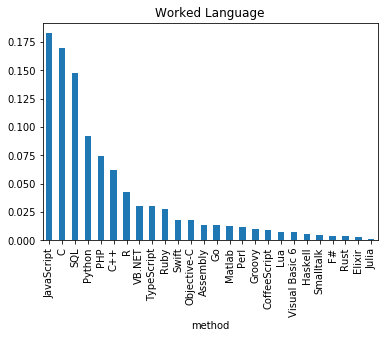

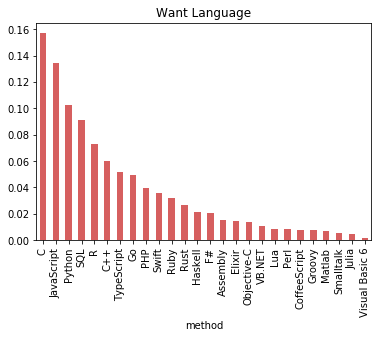

(                   count
 method                  
 JavaScript      0.182871
 C               0.169531
 SQL             0.147289
 Python          0.092314
 PHP             0.074179
 C++             0.061930
 R               0.042561
 VB.NET          0.030526
 TypeScript      0.029956
 Ruby            0.027725
 Swift           0.018064
 Objective-C     0.017708
 Assembly        0.013079
 Go              0.013055
 Matlab          0.012367
 Perl            0.011892
 Groovy          0.009661
 CoffeeScript    0.009376
 Lua             0.007548
 Visual Basic 6  0.006836
 Haskell         0.005388
 Smalltalk       0.004391
 F#              0.004059
 Rust            0.003679
 Elixir          0.002943
 Julia           0.001068,                    count
 method                  
 C               0.157118
 JavaScript      0.134785
 Python          0.102649
 SQL             0.091275
 R               0.072872
 C++             0.059925
 TypeScript      0.051741
 Go              0.049776
 PHP        

In [20]:
clean_and_plot_sub1(sub1_rm)

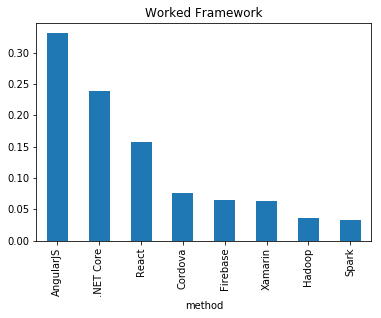

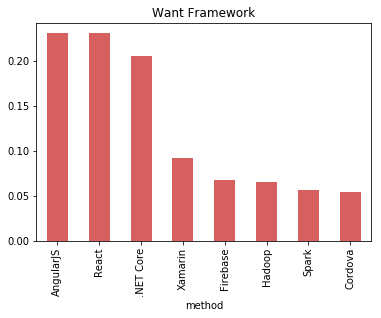

(              count
 method             
 AngularJS  0.330814
 .NET Core  0.239517
 React      0.157850
 Cordova    0.076060
 Firebase   0.064725
 Xamarin    0.062774
 Hadoop     0.035471
 Spark      0.032789,               count
 method             
 AngularJS  0.230456
 React      0.230456
 .NET Core  0.205107
 Xamarin    0.091868
 Firebase   0.066889
 Hadoop     0.065686
 Spark      0.055787
 Cordova    0.053752)

In [21]:
clean_and_plot_sub2(sub2_rm)

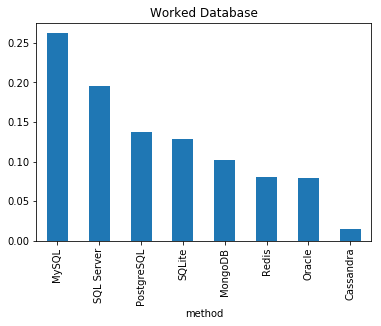

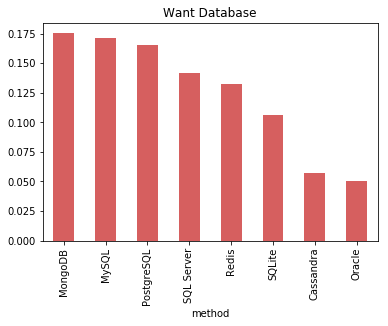

(               count
 method              
 MySQL       0.262018
 SQL Server  0.195587
 PostgreSQL  0.137727
 SQLite      0.128634
 MongoDB     0.101703
 Redis       0.080273
 Oracle      0.078883
 Cassandra   0.015174,                count
 method              
 MongoDB     0.175316
 MySQL       0.171613
 PostgreSQL  0.165330
 SQL Server  0.141711
 Redis       0.132230
 SQLite      0.106648
 Cassandra   0.057111
 Oracle      0.050042)

In [22]:
clean_and_plot_sub3(sub3_rm)

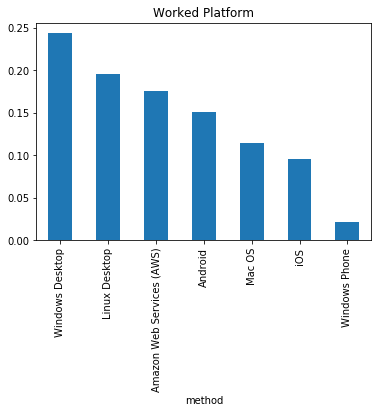

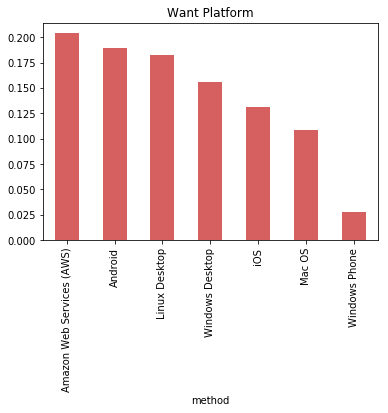

(                              count
 method                             
 Windows Desktop            0.243949
 Linux Desktop              0.196078
 Amazon Web Services (AWS)  0.175456
 Android                    0.151454
 Mac OS                     0.115010
 iOS                        0.096078
 Windows Phone              0.021974,                               count
 method                             
 Amazon Web Services (AWS)  0.204158
 Android                    0.189455
 Linux Desktop              0.182465
 Windows Desktop            0.155890
 iOS                        0.131365
 Mac OS                     0.109009
 Windows Phone              0.027659)

In [23]:
clean_and_plot_sub4(sub4_rm)

In [ ]:
job_sol_3 = {'The top 3 programming Languages change from worked to wanted: Javascript>C>SQL -> C>Javascript>Python',
             'The top 3 Frameworks: AngularJS,React,.NET Core',
             'The top 3 Databases change from worked to wanted: MySQL > SQL Server > PostgreSQL -> MongoDB > MySQL > PostgreSQL',
             'The top 3 Platforms change from worked to wanted: Windows Desktop>Linux Desktop> AWS -> AWS>Android>Linux Desktop.'
             }
print(job_sol_3) 